# Scraping the Jumia webpage for products prices and discounts

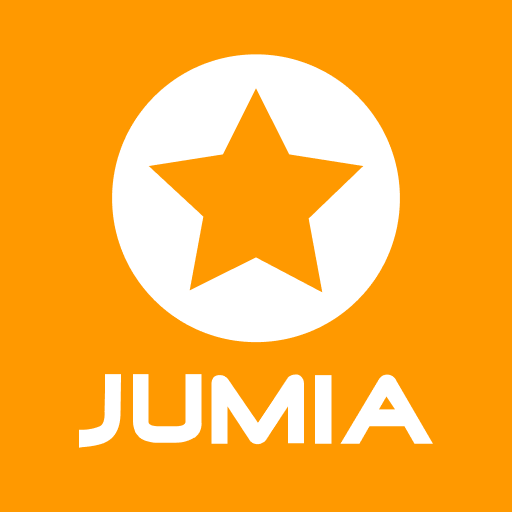

## Get the webpage 

In [1]:
#importing modules
import requests 
from bs4 import BeautifulSoup 

In [2]:
#access the website 
url= 'https://www.jumia.com.ng'
response = requests.get(url)
response.text


'<!DOCTYPE html><html lang="en" dir="ltr"><head><meta charset="utf-8" /><title>Jumia Nigeria | Online Shopping for Groceries, Appliances &amp; More!</title><meta property="og:type" content="product" /><meta property="og:site_name" content="Jumia Nigeria" /><meta property="og:title" content="Jumia Nigeria | Online Shopping for Groceries, Appliances &amp; More!" /><meta property="og:description" content="Jumia Nigeria the #1 Online store in Nigeria - Shop Online for All Kinds of Products &amp; Enjoy Great Prices And Offers ✓ Best prices in Nigeria ✓ Online shop you can trust ✓ Order now and enjoy pay on delivery! " /><meta property="og:url" content="/" /><meta property="og:image" content="https://ng.jumia.is/cms/jumialogonew.png" /><meta property="og:locale" content="en_NG" /><meta name="title" content="Jumia Nigeria | Online Shopping for Groceries, Appliances &amp; More!" /><meta name="robots" content="index, follow" /><meta name="description" content="Jumia Nigeria the #1 Online store 

In [3]:
#prepare the webpage for parsing
retext = response.text 
soup = BeautifulSoup (retext) 
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Jumia Nigeria | Online Shopping for Groceries, Appliances &amp; More!
  </title>
  <meta content="product" property="og:type"/>
  <meta content="Jumia Nigeria" property="og:site_name"/>
  <meta content="Jumia Nigeria | Online Shopping for Groceries, Appliances &amp; More!" property="og:title"/>
  <meta content="Jumia Nigeria the #1 Online store in Nigeria - Shop Online for All Kinds of Products &amp; Enjoy Great Prices And Offers ✓ Best prices in Nigeria ✓ Online shop you can trust ✓ Order now and enjoy pay on delivery! " property="og:description"/>
  <meta content="/" property="og:url"/>
  <meta content="https://ng.jumia.is/cms/jumialogonew.png" property="og:image"/>
  <meta content="en_NG" property="og:locale"/>
  <meta content="Jumia Nigeria | Online Shopping for Groceries, Appliances &amp; More!" name="title"/>
  <meta content="index, follow" name="robots"/>
  <meta content="Jumia Nigeria the 

## Scrape out the name, price (old and new) and discounts of one product on the webpage

In [4]:
articles = soup.find_all('article',class_ = 'prd _box _hvr')

In [5]:
#find the name of the product 
articles[0].find('div',class_ = 'name').text

'Global Version 2022 New S22+ Ultra 7.3 Inch Android Smartphone 8GB+512GB 7300mAh'

In [6]:
#find the price of the product
articles[0].find('div',class_ = 'prc').text

'₦ 92,000'

In [7]:
#find the old price of the product
old_price = str(articles[0].find('div',class_ = 'prc')).split('"') 
old_pric= old_price[3]
old_pric

'₦ 230,000'

In [8]:
#find the discount of the product 
articles[0].find('div',class_ = 'bdg _dsct').text

'60%'

## Generate a DataFrame containing all the prices of all the products in the webpage. 

In [9]:
products=[]
for article in articles: 
    try:
        name = article.find('div',class_='name').text
        price = article.find('div',class_='prc').text
        discount= article.find('div',class_='bdg _dsct').text
        old_price = str(article.find('div',class_ = 'prc')).split('"') 
        old_pric= old_price[3]
    except Exception as e:
        pass
    products.append([name,price,old_pric,discount])

In [10]:
import pandas as pd
df = pd.DataFrame(products,columns=['Name','Price','Old_Price','Discount'])
df


,Name,Price,Old_Price,Discount
0,Global Version 2022 New S22+ Ultra 7.3 Inch An...,"₦ 92,000","₦ 230,000",60%
1,Fingerprint Touch Bluetooth Headset Noise-canc...,"₦ 2,890","₦ 4,320",33%
2,Bluetooth 5.0 PRO3 Wireless Earphone Waterproo...,"₦ 2,900","₦ 4,455",35%
3,Smart Watch Full Touch Screen Watch - For Andr...,"₦ 4,570","₦ 6,855",33%
4,Men's Slip-on Sneakers - Black,"₦ 3,600","₦ 5,647",36%
...,...,...,...,...
167,Home Touch Stainless Steel Food Flask Set - 5 ...,"₦ 9,500","₦ 12,000",21%
168,All Black Covered Slip-on Pam Slippers- With C...,"₦ 6,000","₦ 7,000",14%
169,Rising Star Quality Boy's Back To School Shoe ...,"₦ 5,999","₦ 10,500 - ₦ 25,000",76%
170,Smart Business Large Capacity Waterproof Lapto...,"₦ 17,999","₦ 10,500 - ₦ 25,000",76%


In [11]:
df.Discount=df.Discount.str.replace('%','')
df.Price=df.Price.str.replace('₦','')
df.Price=df.Price.str.replace(',','')
df["Old_Price"] = df.Old_Price.str.replace('₦','')
df.Old_Price = df.Old_Price.str.replace(',','')
try:
    for i in ['Price', 'Discount','Old_Price']:
        df[i]=df[i].astype('int')
except Exception as e:
    pass
df

,Name,Price,Old_Price,Discount
0,Global Version 2022 New S22+ Ultra 7.3 Inch An...,92000,230000,60
1,Fingerprint Touch Bluetooth Headset Noise-canc...,2890,4320,33
2,Bluetooth 5.0 PRO3 Wireless Earphone Waterproo...,2900,4455,35
3,Smart Watch Full Touch Screen Watch - For Andr...,4570,6855,33
4,Men's Slip-on Sneakers - Black,3600,5647,36
...,...,...,...,...
167,Home Touch Stainless Steel Food Flask Set - 5 ...,9500,12000,21
168,All Black Covered Slip-on Pam Slippers- With C...,6000,7000,14
169,Rising Star Quality Boy's Back To School Shoe ...,5999,10500 - 25000,76
170,Smart Business Large Capacity Waterproof Lapto...,17999,10500 - 25000,76


## Save the DataFrame as a .csv file

In [12]:
#df.to_csv('Jumia.csv')